In [1]:
import os
import numpy as np
from utils import utils
from utils import plotting
import pandas as pd

In [2]:
train_files = ['01', '02', '03', '04', '06', '07', '08', '16', '17', '18'] + ['14', '15', '19']
train_file_names = (map(lambda x : 'w' + x, train_files))
w_id = 'w00'
data_dir = os.path.join('data/mm-fit/', w_id)
t = utils.load_modality(os.path.join(data_dir, w_id + '_pose_2d.npy'))
# x = np.zeros(len(train_file_names), 2, 63918, 19)
# for w_id in train_file_names:
t.shape 

(2, 63918, 19)

In [36]:
t[:, 2, 0]

array([4052., 4052.])

In [19]:
t1 = t[:, :, 1:]

In [21]:
t2 = t1.transpose(1,0,2).reshape(-1,36)

In [57]:
t2_frame = t.transpose(1,0,2).reshape(-1,38)
t2_frame[0]

array([4050.   ,  817.413,  795.951,  741.045,  725.332,  790.002,
        854.694,  905.597,  854.602,  742.945,  682.289,  682.189,
        821.296,  911.485,  870.326,  803.706,  825.284,  776.276,
        837.118, 4050.   ,  343.362,  394.275,  388.42 ,  494.129,
        429.511,  394.276,  500.086,  427.626,  515.744,  558.922,
        696.008,  513.823,  574.5  ,  695.966,  331.602,  333.469,
        331.593,  335.443])

In [58]:
t2_frame.shape

(63918, 38)

In [20]:
t1[:, 0, :]

array([[817.413, 795.951, 741.045, 725.332, 790.002, 854.694, 905.597,
        854.602, 742.945, 682.289, 682.189, 821.296, 911.485, 870.326,
        803.706, 825.284, 776.276, 837.118],
       [343.362, 394.275, 388.42 , 494.129, 429.511, 394.276, 500.086,
        427.626, 515.744, 558.922, 696.008, 513.823, 574.5  , 695.966,
        331.602, 333.469, 331.593, 335.443]])

In [22]:
t2[0]

array([817.413, 795.951, 741.045, 725.332, 790.002, 854.694, 905.597,
       854.602, 742.945, 682.289, 682.189, 821.296, 911.485, 870.326,
       803.706, 825.284, 776.276, 837.118, 343.362, 394.275, 388.42 ,
       494.129, 429.511, 394.276, 500.086, 427.626, 515.744, 558.922,
       696.008, 513.823, 574.5  , 695.966, 331.602, 333.469, 331.593,
       335.443])

In [23]:
t2.shape

(63918, 36)

In [56]:
t2[0]

array([817.413, 795.951, 741.045, 725.332, 790.002, 854.694, 905.597,
       854.602, 742.945, 682.289, 682.189, 821.296, 911.485, 870.326,
       803.706, 825.284, 776.276, 837.118, 343.362, 394.275, 388.42 ,
       494.129, 429.511, 394.276, 500.086, 427.626, 515.744, 558.922,
       696.008, 513.823, 574.5  , 695.966, 331.602, 333.469, 331.593,
       335.443])

In [27]:
np.savetxt('data/X_train_00.txt', t2, fmt='%1.3f', delimiter=',')

In [13]:
labels = utils.load_labels(os.path.join(data_dir, w_id + '_labels.csv'))

[4040, 4500, 10, 'squats']

In [14]:
# encodings for labels in dataset
classes = ['squats', 'lunges', 'bicep_curls', 'situps', 
        'pushups', 'tricep_extensions', 'dumbbell_rows', 
        'jumping_jacks', 'dumbbell_shoulder_press', 
        'lateral_shoulder_raises']
d={}
for i,ex in enumerate(classes):
    d[ex] = i
d

{'squats': 0,
 'lunges': 1,
 'bicep_curls': 2,
 'situps': 3,
 'pushups': 4,
 'tricep_extensions': 5,
 'dumbbell_rows': 6,
 'jumping_jacks': 7,
 'dumbbell_shoulder_press': 8,
 'lateral_shoulder_raises': 9}

In [55]:
y.shape

(14553, 2)

In [54]:
# Storing the label for each frame
y = []
for label in labels:
    f1, f2, rep, lbl = label
    for frame in range(f1, f2+1):
        y.append([frame, d[lbl]])
y = np.array(y)
np.savetxt('data/y_train_00.txt', y, fmt='%d', delimiter=',')

In [104]:
def prepare_dataset(files, data_path):
    """
    Prepare the dataset using the files provided
    """
    from tqdm import tqdm

    df = pd.DataFrame()
    
    for w_id in tqdm(files):
        data_dir = os.path.join(data_path, w_id)
        t = utils.load_modality(os.path.join(data_dir, w_id + '_pose_2d.npy'))
        t2_frame = t.transpose(1,0,2).reshape(-1,38)
        
        # Creating nparray for ylabels
        y = []
        labels = utils.load_labels(os.path.join(data_dir, w_id + '_labels.csv'))
        for label in tqdm(labels):
            f1, f2, rep, lbl = label
            for frame in range(f1, f2+1):
                y.append([frame, d[lbl]])
        y = np.array(y)
        y_df = pd.DataFrame(y)

        # Frame appears twice. Once at the beginning (index 0) and once at pos 19. We don't need the second one.
        t2_df=pd.DataFrame(t2_frame).drop(19, axis=1)
        # Removing noise from data 
        # We will only retain the rows in the dataframe for which we have labels available.
        # Achieved with inner join
        df = pd.concat([df,t2_df.merge(y_df, how='inner', on=0)])
    return df

In [107]:
train_files = ['00', '01', '02', '03', '04', '06', '07', '08', 
               '16', '17', '18', '14', '15', '19', '20', '12', '13']
train_file_names = list(map(lambda x : 'w' + x, train_files))
test_files = ['05', '09', '10', '11']
test_file_names = list(map(lambda x : 'w' + x, test_files))
data_path = 'data/mm-fit/'

train_df = prepare_dataset(train_file_names, data_path)
test_df = prepare_dataset(test_file_names, data_path)
print(train_df.shape)
print(test_df.shape)

100%|██████████| 4/4 [00:00<00:00,  9.54it/s]

(299920, 38)
(73833, 38)


In [108]:
train_df.head()

,0,1_x,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,1_y
0,4050.0,817.413,795.951,741.045,725.332,790.002,854.694,905.597,854.602,742.945,...,558.922,696.008,513.823,574.500,695.966,331.602,333.469,331.593,335.443,0
1,4051.0,817.449,797.849,741.076,723.419,789.943,854.774,907.542,852.803,744.947,...,560.786,695.991,525.546,576.534,696.006,345.294,345.294,343.328,347.286,0
2,4052.0,817.449,797.897,741.083,717.569,788.034,856.611,907.562,852.783,746.930,...,560.805,695.996,537.256,580.364,696.006,355.174,355.179,357.045,360.971,0
3,4053.0,817.449,799.797,742.924,717.558,788.013,856.659,907.562,852.738,748.902,...,560.842,695.996,543.182,582.320,696.046,368.797,368.740,368.810,368.863,0
4,4054.0,817.449,801.764,742.938,717.536,788.013,856.659,907.602,852.738,750.873,...,562.738,696.007,552.929,584.258,696.046,378.600,378.642,378.589,382.432,0


In [109]:
test_df.head()

,0,1_x,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,1_y
0,2830.0,554.996,556.818,494.154,449.190,478.490,619.509,660.750,633.292,519.641,...,519.693,654.888,396.193,509.893,654.865,151.430,151.433,151.394,153.295,0
1,2831.0,554.996,556.818,494.154,449.190,478.525,617.632,660.750,631.255,519.687,...,519.693,656.775,398.133,509.893,656.840,163.141,163.163,163.141,163.139,0
2,2832.0,554.996,556.886,494.297,449.190,490.223,617.632,660.709,617.672,519.687,...,519.693,656.784,404.078,511.825,658.786,190.483,188.608,192.519,190.508,0
3,2833.0,554.996,556.895,496.123,449.190,490.224,617.632,660.704,617.672,521.608,...,519.693,656.836,404.083,511.826,658.786,190.484,188.609,192.519,190.508,0
4,2834.0,556.809,556.897,496.193,453.055,494.220,617.632,658.763,613.705,521.628,...,519.694,656.838,415.799,513.799,658.786,204.253,204.261,208.187,208.118,0


In [120]:
# Saving X data for training and testing 
np.savetxt(
    'data/X_train.txt',
    train_df.iloc[:,1:-1].values,
    fmt = '%1.3f',
    delimiter = ','
)
np.savetxt(
    'data/X_test.txt',
    test_df.iloc[:,1:-1].values,
    fmt = '%1.3f',
    delimiter = ','
)

In [121]:
# Saving Y data for training and testing
np.savetxt(
    'data/Y_train.txt',
    train_df.iloc[:,-1].values,
    fmt = '%d',
    delimiter = ','
)
np.savetxt(
    'data/Y_test.txt',
    test_df.iloc[:,-1].values,
    fmt = '%d',
    delimiter = ','
)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from keras import optimizers
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import matplotlib.pyplot as plt

def load_X(X_path):
    file = open(X_path, 'r')
    X_ = np.array(
        [elem for elem in [
            row.split(',') for row in file
        ]], 
        dtype=np.float32
    )
    file.close()
    return X_

def load_Y(y_path):
    file = open(y_path, 'r')
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    return y_

In [2]:
def euclidean_dist(a, b):
    # This function calculates the euclidean distance between 2 point in 2-D coordinates
    # if one of two points is (0,0), dist = 0
    # a, b: input array with dimension: m, 2
    # m: number of samples
    # 2: x and y coordinate
    try:
        if (a.shape[1] == 2 and a.shape == b.shape):
            # check if element of a and b is (0,0)
            bol_a = (a[:,0] != 0).astype(int)
            bol_b = (b[:,0] != 0).astype(int)
            dist = np.linalg.norm(a-b, axis=1)
            return((dist*bol_a*bol_b).reshape(a.shape[0],1))
    except:
        print("[Error]: Check dimension of input vector")
        return 0

In [3]:
def norm_X(X):
    num_sample = X.shape[0]
    # Keypoints
    Nose = X[:,0*2:0*2+2]
    Neck = X[:,1*2:1*2+2]
    RShoulder = X[:,2*2:2*2+2]
    RElbow = X[:,3*2:3*2+2]
    RWrist = X[:,4*2:4*2+2]
    LShoulder = X[:,5*2:5*2+2]
    LElbow = X[:,6*2:6*2+2]
    LWrist = X[:,7*2:7*2+2]
    RHip = X[:,8*2:8*2+2]
    RKnee = X[:,9*2:9*2+2]
    RAnkle = X[:,10*2:10*2+2]
    LHip = X[:,11*2:11*2+2]
    LKnee = X[:,12*2:12*2+2]
    LAnkle = X[:,13*2:13*2+2]
    REye = X[:,14*2:14*2+2]
    LEye = X[:,15*2:15*2+2]
    REar = X[:,16*2:16*2+2]
    LEar = X[:,17*2:17*2+2]

    # Length of head
    length_Neck_LEar = euclidean_dist(Neck, LEar)
    length_Neck_REar = euclidean_dist(Neck, REar)
    length_Neck_LEye = euclidean_dist(Neck, LEye)
    length_Neck_REye = euclidean_dist(Neck, REye)
    length_Nose_LEar = euclidean_dist(Nose, LEar)
    length_Nose_REar = euclidean_dist(Nose, REar)
    length_Nose_LEye = euclidean_dist(Nose, LEye)
    length_Nose_REye = euclidean_dist(Nose, REye)
    length_head      = np.maximum.reduce([length_Neck_LEar, length_Neck_REar, length_Neck_LEye, length_Neck_REye, \
                                 length_Nose_LEar, length_Nose_REar, length_Nose_LEye, length_Nose_REye])
    #length_head      = np.sqrt(np.square((LEye[:,0:1]+REye[:,0:1])/2 - Neck[:,0:1]) + np.square((LEye[:,1:2]+REye[:,1:2])/2 - Neck[:,1:2]))

    # Length of torso
    length_Neck_LHip = euclidean_dist(Neck, LHip)
    length_Neck_RHip = euclidean_dist(Neck, RHip)
    length_torso     = np.maximum(length_Neck_LHip, length_Neck_RHip)
    #length_torso     = np.sqrt(np.square(Neck[:,0:1]-(LHip[:,0:1]+RHip[:,0:1])/2) + np.square(Neck[:,1:2]-(LHip[:,1:2]+RHip[:,1:2])/2))

    # Length of right leg
    length_leg_right = euclidean_dist(RHip, RKnee) + euclidean_dist(RKnee, RAnkle)
    #length_leg_right = np.sqrt(np.square(RHip[:,0:1]-RKnee[:,0:1]) + np.square(RHip[:,1:2]-RKnee[:,1:2])) \
    #+ np.sqrt(np.square(RKnee[:,0:1]-RAnkle[:,0:1]) + np.square(RKnee[:,1:2]-RAnkle[:,1:2]))

    # Length of left leg
    length_leg_left = euclidean_dist(LHip, LKnee) + euclidean_dist(LKnee, LAnkle)
    #length_leg_left = np.sqrt(np.square(LHip[:,0:1]-LKnee[:,0:1]) + np.square(LHip[:,1:2]-LKnee[:,1:2])) \
    #+ np.sqrt(np.square(LKnee[:,0:1]-LAnkle[:,0:1]) + np.square(LKnee[:,1:2]-LAnkle[:,1:2]))

    # Length of leg
    length_leg = np.maximum(length_leg_right, length_leg_left)

    # Length of body
    length_body = length_head + length_torso + length_leg
    
    # Check all samples have length_body of 0
    length_chk = (length_body > 0).astype(int)
    
    # Check keypoints at origin
    keypoints_chk = (X > 0).astype(int)
    
    chk = length_chk * keypoints_chk
    
    # Set all length_body of 0 to 1 (to avoid division by 0)
    length_body[length_body == 0] = 1
    
    # The center of gravity
    # number of point OpenPose locates:
    num_pts = (X[:, 0::2] > 0).sum(1).reshape(num_sample,1)
    centr_x = X[:, 0::2].sum(1).reshape(num_sample,1) / num_pts
    centr_y = X[:, 1::2].sum(1).reshape(num_sample,1) / num_pts

    # The  coordinates  are  normalized relative to the length of the body and the center of gravity
    X_norm_x = (X[:, 0::2] - centr_x) / length_body
    X_norm_y = (X[:, 1::2] - centr_y) / length_body
    
    # Stack 1st element x and y together
    X_norm = np.column_stack((X_norm_x[:,:1], X_norm_y[:,:1]))
        
    for i in range(1, X.shape[1]//2):
        X_norm = np.column_stack((X_norm, X_norm_x[:,i:i+1], X_norm_y[:,i:i+1]))
    
    # Set all samples have length_body of 0 to origin (0, 0)
    X_norm = X_norm * chk
    
    return X_norm

In [4]:
def plot_line(a, b):
    if (a.any()> 0 and b.any()>0): plt.plot([a[0], b[0]], [a[1], b[1]], 'k-')
        
def plot_skeleton(sample, pattern):
    for i in range(len(sample)//2):
        plt.plot(sample[i*2], sample[i*2+1], pattern) 
    skeleton = sample.reshape(1, 36)
    Nose = skeleton[:,0*2:0*2+2][0]
    Neck = skeleton[:,1*2:1*2+2][0]
    RShoulder = skeleton[:,2*2:2*2+2][0]
    RElbow = skeleton[:,3*2:3*2+2][0]
    RWrist = skeleton[:,4*2:4*2+2][0]
    LShoulder = skeleton[:,5*2:5*2+2][0]
    LElbow = skeleton[:,6*2:6*2+2][0]
    LWrist = skeleton[:,7*2:7*2+2][0]
    RHip = skeleton[:,8*2:8*2+2][0]
    RKnee = skeleton[:,9*2:9*2+2][0]
    RAnkle = skeleton[:,10*2:10*2+2][0]
    LHip = skeleton[:,11*2:11*2+2][0]
    LKnee = skeleton[:,12*2:12*2+2][0]
    LAnkle = skeleton[:,13*2:13*2+2][0]
    REye = skeleton[:,14*2:14*2+2][0]
    LEye = skeleton[:,15*2:15*2+2][0]
    REar = skeleton[:,16*2:16*2+2][0]
    LEar = skeleton[:,17*2:17*2+2][0]
    #Nose = sample.reshape(1, 36)[:,0*2:0*2+2][0]
    #Neck = sample.reshape(1, 36)[:,1*2:1*2+2][0]
    plot_line(LEar, LEye)
    plot_line(LEye, Nose)
    plot_line(REar, REye)
    plot_line(REye, Nose)
    plot_line(Nose, Neck)
    plot_line(Neck, LShoulder)
    plot_line(LShoulder, LElbow)
    plot_line(LElbow, LWrist)
    plot_line(Neck, RShoulder)
    plot_line(RShoulder, RElbow)
    plot_line(RElbow, RWrist)
    plot_line(Neck, LHip)
    plot_line(LHip, LKnee)
    plot_line(LKnee, LAnkle)
    plot_line(Neck, RHip)
    plot_line(RHip, RKnee)
    plot_line(RKnee, RAnkle)
    
def plot(sample):
    # sample is one-dimension array
    # e.g: (36,)
    if sample.shape[0] == 36:
        sample_norm = norm_X(sample.reshape(1,36))[0]

        # Plot original coordinates
        pad_ori = 40
        plt.figure(str(sample))
        plt.subplot(121)
        plt.title('Original skeleton')
        X_ori = sample
        x_max = max(X_ori[0::2]) + pad_ori
        x_min = min(i for i in X_ori[0::2] if i > 0) - pad_ori
        y_max = max(X_ori[1::2]) + pad_ori
        y_min = min(j for j in X_ori[1::2] if j > 0) - pad_ori
        plt.xlim(x_min,x_max)
        plt.ylim(y_max, y_min)
        plot_skeleton(X_ori, 'bo')

        # Plot normalized coordinates
        pad_nor = 0.2
        #plt.figure(2)
        plt.subplot(122)
        plt.title('Normalized skeleton')
        X_nor = sample_norm
        x_max = max(X_nor[0::2]) + pad_nor
        x_min = min(X_nor[0::2]) - pad_nor
        y_max = max(X_nor[1::2]) + pad_nor
        y_min = min(X_nor[1::2]) - pad_nor
        plt.xlim(x_min,x_max)
        plt.ylim(y_max, y_min)
        plot_skeleton(X_nor, 'ro')
    else:
        print("sample is one-dimension array: (36,)")

In [5]:
# Create a model
model = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=(36,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    # keras.layers.Dense(32, activation='sigmoid'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

# plot training log
def plot_history(history):
    history_dict = history.history
    history_dict.keys()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'ro', label='Validation loss')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation loss/acc')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2368      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [8]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [7]:
# Load and norminalize dataset
X_train = load_X('data/X_train.txt')
Y_train = load_Y('data/Y_train.txt')
X_train_norm = norm_X(X_train)

X_test = load_X('data/X_test.txt')
Y_test = load_Y('data/Y_test.txt')
X_test_norm = norm_X(X_test)

In [9]:
history = model.fit(
    X_train_norm, 
    Y_train, 
    validation_data=(X_test_norm, Y_test), 
    epochs=10, batch_size=32, verbose=1)

Epoch 1/10
9373/9373 [==============================] - 33s 3ms/step - loss: 1.2050 - accuracy: 0.5139 - val_loss: 0.6857 - val_accuracy: 0.7646
Epoch 2/10
9373/9373 [==============================] - 31s 3ms/step - loss: 0.8513 - accuracy: 0.6693 - val_loss: 0.4809 - val_accuracy: 0.8397
Epoch 3/10
9373/9373 [==============================] - 32s 3ms/step - loss: 0.7373 - accuracy: 0.7192 - val_loss: 0.4053 - val_accuracy: 0.8647
Epoch 4/10
9373/9373 [==============================] - 32s 3ms/step - loss: 0.6695 - accuracy: 0.7615 - val_loss: 0.2911 - val_accuracy: 0.9489
Epoch 5/10
9373/9373 [==============================] - 31s 3ms/step - loss: 0.6041 - accuracy: 0.8006 - val_loss: 0.2395 - val_accuracy: 0.9424
Epoch 6/10
9373/9373 [==============================] - 31s 3ms/step - loss: 0.5718 - accuracy: 0.8173 - val_loss: 0.2255 - val_accuracy: 0.9531
Epoch 7/10
9373/9373 [==============================] - 31s 3ms/step - loss: 0.5466 - accuracy: 0.8279 - val_loss: 0.2116 - val_ac

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

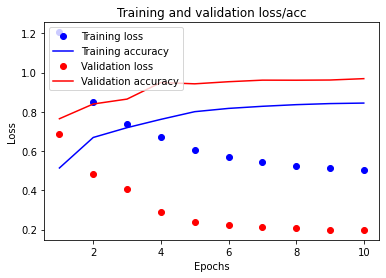

In [11]:
plot_history(history)

In [22]:
# save model 
model.save('deepfit_classifier.h5')

Estimated pose:
squats: 	0.92554057
lunges: 	8.3217235e-12
bicep_curls: 	0.0017482829
situps: 	0.000103655315
pushups: 	9.804159e-05
tricep_extensions: 	0.04943591
dumbbell_rows: 	2.4014582e-05
jumping_jacks: 	0.008472454
dumbbell_shoulder_press: 	0.014545405
lateral_shoulder_raises: 	3.167966e-05


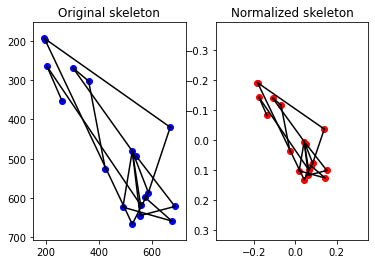

In [35]:
# Testing on single example
LABELS = list(d.keys())

X_sample = load_X('data/X_test.txt')[0+1234:2+1234]
X_sample_norm = norm_X(X_sample)
y_out = model.predict(X_sample_norm[0].reshape(1, 36))

print("Estimated pose:")
for idx in range(len(LABELS)):
    print(LABELS[idx] + ": \t" + str(y_out[0][idx]))
plot(X_sample[1])

In [36]:
y_out.max()

0.92554057

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open('deepfit_classifier.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpnpijjzwz/assets


INFO:tensorflow:Assets written to: /tmp/tmpnpijjzwz/assets
